# CNN

## Import Module

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Set Parameters

In [94]:
epoch = 1
batch_size = 50  
lr = 0.001  #learning rate
DOWNLOAD_MNIST = False

## Data Acquisition

torch.Size([60000, 28, 28])
torch.Size([60000])


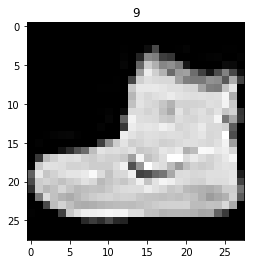

In [95]:
train_data = torchvision.datasets.FashionMNIST(root='C:/Users/Cesare/DeeplearningwirtPytorch/data/FashionMNIST',train=True, 
                                               transform=transforms.ToTensor(),download=False)
#plot the example
print(train_data.data.size())
print(train_data.targets.size())
plt.imshow(train_data.data[0].numpy(),cmap='gray')
plt.title('%i'%train_data.targets[0])
plt.show()

train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size,shuffle=True)

## Test Data

In [96]:
test_data = torchvision.datasets.FashionMNIST(root='C:/Users/Cesare/DeeplearningwirtPytorch/data/',train=False,
                                             transform=transforms.ToTensor(),download=False)
print(test_data)
test_x = torch.unsqueeze(test_data.data,dim=1).type(torch.FloatTensor)[:2000]/255
test_y = test_data.targets[:2000]

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: C:/Users/Cesare/DeeplearningwirtPytorch/data/
    Split: Test
    StandardTransform
Transform: ToTensor()


## Build Network Module    

In [97]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=8,kernel_size=3,stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=1,padding=1)
        
        self.fc1 = nn.Linear(in_features=16*7*7,out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        x = F.relu(self.fc1(x.reshape(-1,16*7*7))) 
        #也可以写作：
        #x = F.relu(self.fc1(x.view(x.size(0),-1)))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

## Instance

In [98]:
cnn = CNN()
optimizer = torch.optim.Adam(cnn.parameters(),lr=lr)
loss_func = nn.CrossEntropyLoss()

## Training process 

In [99]:
for epoch in range(epoch):
    for step, (x,y) in enumerate(train_loader):
        output = cnn(x) 
        loss = loss_func(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%50 ==0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output,1)[1].data.squeeze()
            accuracy = float(sum(pred_y ==test_y))/float(test_y.size(0))
            print('Epoch:',epoch,'|train_loss:%.4f'%loss.data.numpy(),'|test accuracy:%.2f'%accuracy)

#print 10 predictions from test data
test_output = cnn(test_x[:10])
pred_y = torch.max(test_output,1)[1].data.numpy().squeeze() #torch.max 会返回softmax中的最大值[value,index]用[1]指定为index输出
#此处应该也可以写成test_output.argmax(1).data.numpy()  直接给出index
print(pred_y,'pred number')
print(test_y[:10].numpy(),'real number')

Epoch: 0 |train_loss:2.3064 |test accuracy:0.10
Epoch: 0 |train_loss:0.8122 |test accuracy:0.57
Epoch: 0 |train_loss:0.5694 |test accuracy:0.70
Epoch: 0 |train_loss:0.9210 |test accuracy:0.73
Epoch: 0 |train_loss:0.6960 |test accuracy:0.75
Epoch: 0 |train_loss:0.4293 |test accuracy:0.77
Epoch: 0 |train_loss:0.7120 |test accuracy:0.77
Epoch: 0 |train_loss:0.6185 |test accuracy:0.77
Epoch: 0 |train_loss:0.5807 |test accuracy:0.80
Epoch: 0 |train_loss:0.3804 |test accuracy:0.80
Epoch: 0 |train_loss:0.3500 |test accuracy:0.82
Epoch: 0 |train_loss:0.6475 |test accuracy:0.80
Epoch: 0 |train_loss:0.5581 |test accuracy:0.82
Epoch: 0 |train_loss:0.5267 |test accuracy:0.82
Epoch: 0 |train_loss:0.6295 |test accuracy:0.82
Epoch: 0 |train_loss:0.5093 |test accuracy:0.83
Epoch: 0 |train_loss:0.5201 |test accuracy:0.82
Epoch: 0 |train_loss:0.3316 |test accuracy:0.85
Epoch: 0 |train_loss:0.2917 |test accuracy:0.82
Epoch: 0 |train_loss:0.3396 |test accuracy:0.84
Epoch: 0 |train_loss:0.5265 |test accura